In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np 
from scipy.sparse.linalg import eigsh
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from community import community_louvain
from recover_data import recover_data
from igraph import Graph, plot

In [33]:
A = recover_data()
G = nx.from_numpy_array(A)

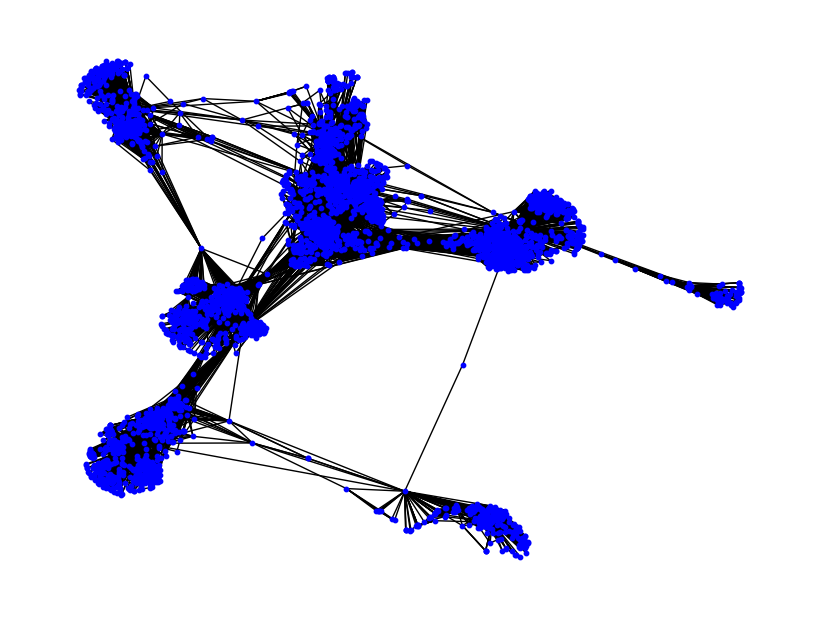

In [14]:
plt.figure(figsize=(8, 6))
nx.draw(G, node_size=10, node_color="blue", font_weight="bold")
plt.show()

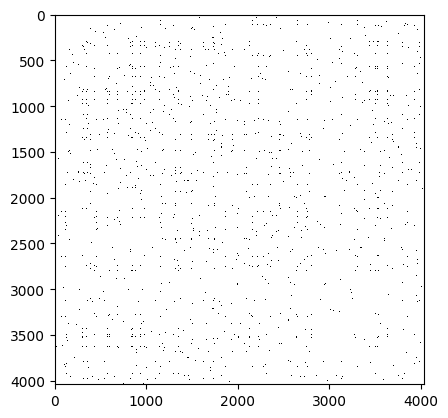

In [35]:
adj_matrix = nx.adjacency_matrix(G).todense()
nodes = list(G.nodes)
random_order = np.random.permutation(nodes)
reordered_matrix = adj_matrix[np.ix_(random_order, random_order)]
plt.imshow(reordered_matrix, cmap="Greys", interpolation="none")

## Louvain

In [17]:
partition_face = community_louvain.best_partition(G)

nbr de communauté =  16


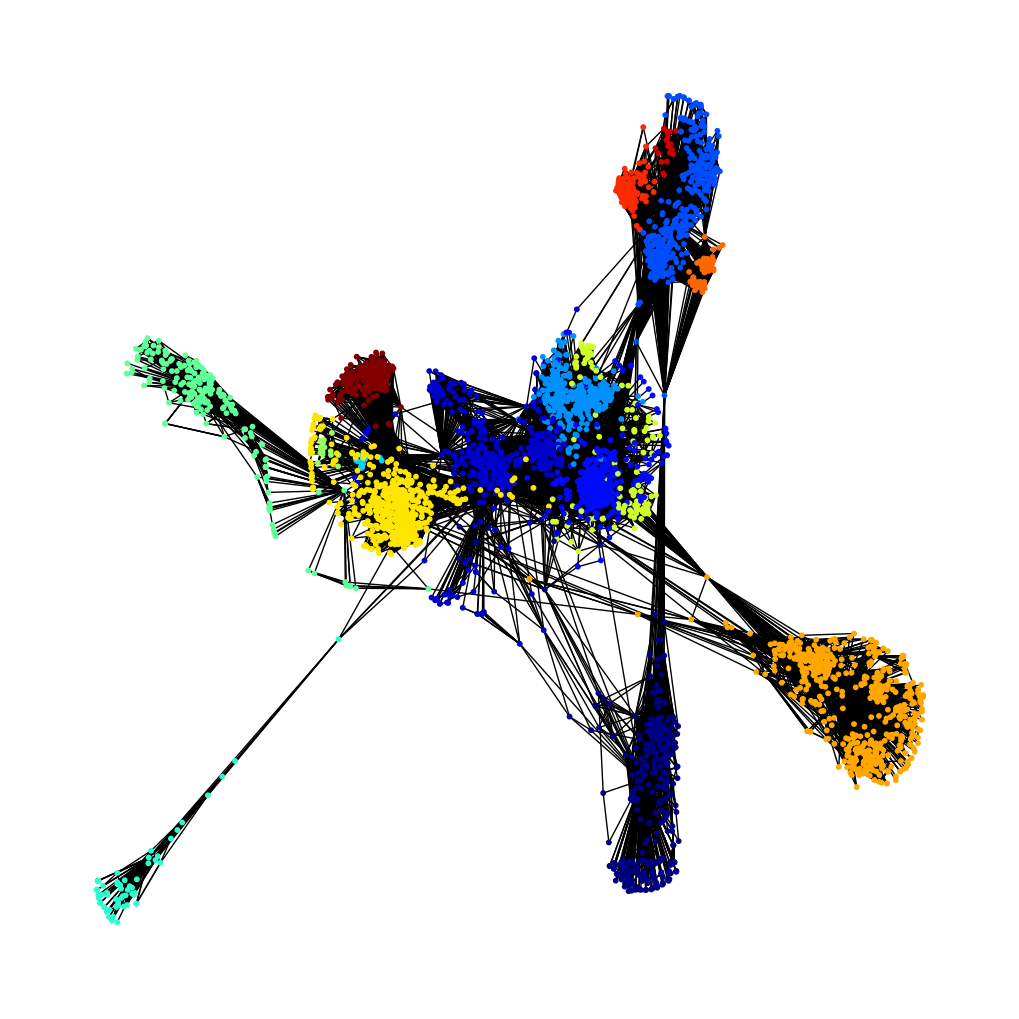

In [19]:
pos = nx.spring_layout(G)  # Disposition des nœuds
print('nbr de communauté = ', max(partition_face.values()) + 1)
plt.figure(figsize=(10, 10))
cmap = plt.get_cmap("jet", max(partition_face.values()) + 1)  # Créer un colormap pour les communautés
nx.draw(G, pos, node_color=list(partition_face.values()), cmap=cmap, with_labels=False, node_size=10)
plt.show()

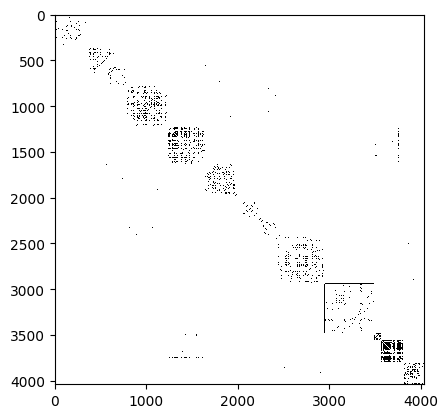

In [20]:
sorted_nodes = sorted(G.nodes, key=lambda node: partition_face[node])
adj_matrix = nx.adjacency_matrix(G, nodelist=sorted_nodes).todense()
plt.imshow(adj_matrix, cmap="Greys", interpolation="none")

In [21]:
modularity = community_louvain.modularity(partition_face, G)
modularity

0.8348238969538418

## Walktrap

In [28]:
G_1 = Graph(edges=G.edges, directed=False)
community = G_1.community_walktrap(weights=None,steps = 10)
clusters = community.as_clustering()

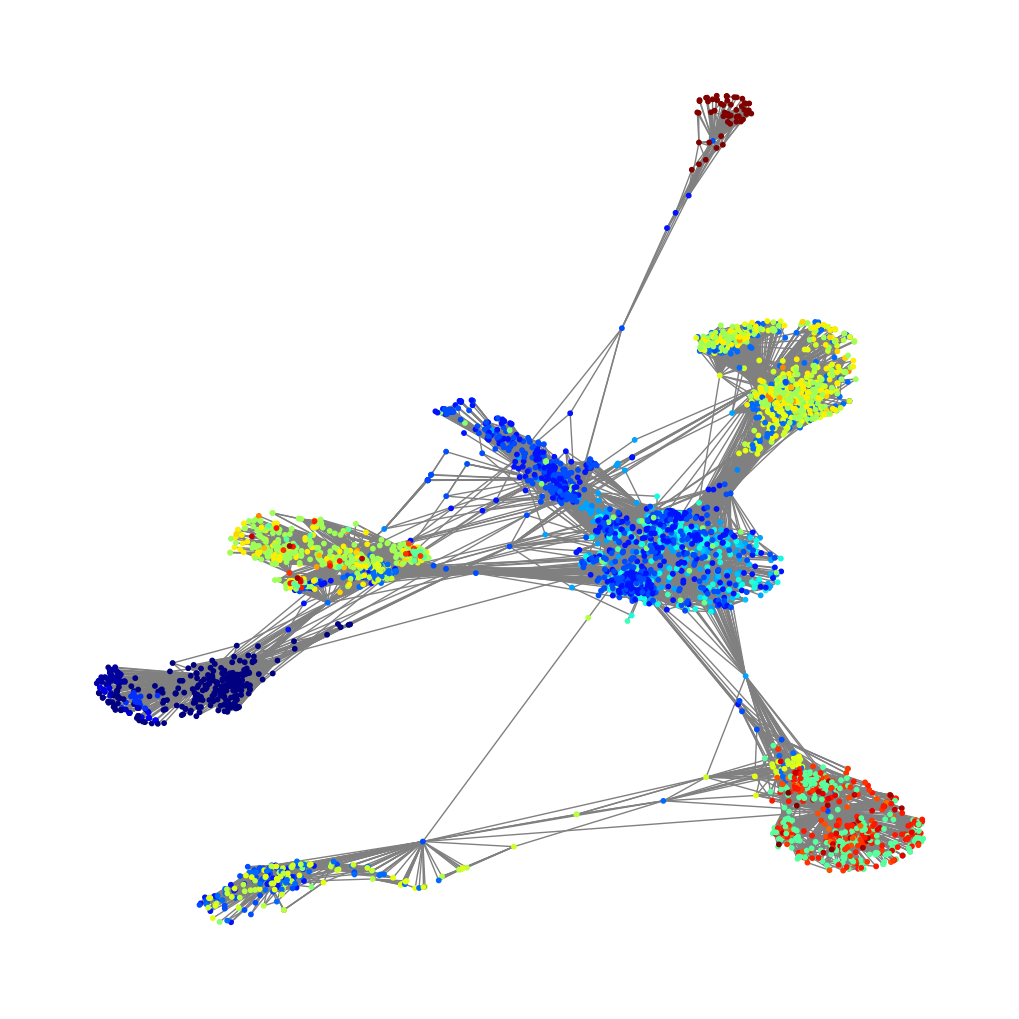

nbr de communauté =  36


In [29]:

G_networkx = nx.Graph()
G_networkx.add_edges_from(G.edges)
membership = clusters.membership  # Liste des appartenances des sommets
colors = membership  # Utilisé pour mapper les communautés aux couleurs
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_networkx)  # Positionnement des nœuds
cmap = plt.get_cmap("jet", len(set(colors)))  # Colormap dynamique pour les communautés
nx.draw(
    G_networkx, 
    pos, 
    node_color=colors, 
    cmap=cmap,  
    node_size=10, 
    edge_color="gray"
)
plt.show()
print('nbr de communauté = ', len(clusters))

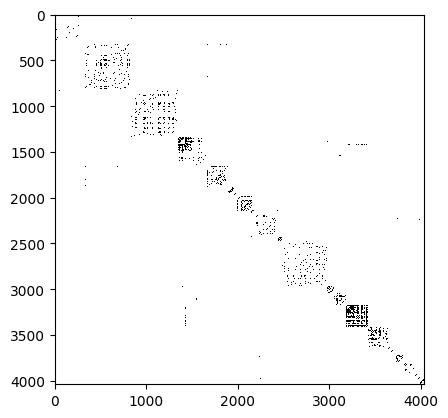

In [31]:
membership = clusters.membership
for node, cluster_id in enumerate(membership):
    G_networkx.nodes[node]['community'] = cluster_id

# Réordonner les nœuds par communauté
sorted_nodes = sorted(G_networkx.nodes, key=lambda x: G_networkx.nodes[x]['community'])

# Créer la matrice d'adjacence réordonnée
adj_matrix = nx.adjacency_matrix(G_networkx, nodelist=sorted_nodes).todense()
plt.imshow(adj_matrix, cmap="Greys", interpolation="none")

In [36]:
modularity = clusters.modularity
modularity

0.8245214444518957